<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/GeekBrains/%D0%9C%D0%B0%D1%82%D1%81%D1%82%D0%B0%D1%82_%D1%83%D1%80%D0%BE%D0%BA_8_%D0%94%D0%97_%D0%9A%D0%BE%D0%B6%D0%B5%D0%BC%D1%8F%D0%BA%D0%B8%D0%BD_%D0%92_%D0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Настройка

In [90]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Задание
Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

## Решение

In [91]:
foot = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hock = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
shtan = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

Посмотрим как все это будет выглядеть на графике

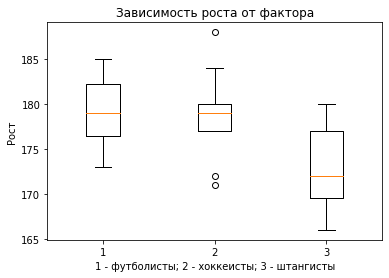

In [92]:
plt.boxplot([foot, hock, shtan])
plt.title('Зависимость роста от фактора')
plt.ylabel('Рост')
plt.xlabel('1 - футболисты; 2 - хоккеисты; 3 - штангисты')
plt.show()

Из графика явно видно, что средний рост штангистов меньше роста футболистов и хоккеистов.

Определим является ли различие статически значимым. По идее так и должно получиться.

Определим $\overline{y}_{i}$ — среднее значение переменной $Y$ для каждого из факторов. 

Определяется по формуле:
$$\overline{y}_{i} = \frac{1}{n_i}\sum\limits_{j=1}^{n_i}y_{ij}$$
тогда:
* $\overline{y}_{1} = 179,125$ - средний рост футболиста
* $\overline{y}_{2} = 178,667$ - средний рост хоккеиста
* $\overline{y}_{3} = 172,727$ - средний рост штангиста

In [93]:
y1_mean = np.mean(foot)
y2_mean = np.mean(hock)
y3_mean = np.mean(shtan)
print(f'Средний рост футболитса - y1_mean = {round(y1_mean, 3)}')
print(f'Средний рост хоккеиста - y2_mean = {round(y2_mean, 3)}')
print(f'Средний рост штангиста - y3_mean = {round(y3_mean, 3)}')

Средний рост футболитса - y1_mean = 179.125
Средний рост хоккеиста - y2_mean = 178.667
Средний рост штангиста - y3_mean = 172.727


Из расчтетов тоже видно, что средний рост разниться и явно видно, что основная разница между штангистами и остальными.
Такой крупной разницы между футболистами и хоккеистами не наблюдается.

Продолжим вычисления для опредения является ли это отличие статистически значимиым.
Найдем $\overline{Y}$ — среднее значение переменной $Y$ по всем значениям по следующей формуле:
$$\overline{Y} = \frac{1}{n}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}y_{ij} = \frac{1}{n}\sum\limits_{i=1}^{k}\overline{y}_{i}n_{i} = 176,464$$



In [94]:
k = 3
n_1 = foot.size
n_2 = hock.size
n_3 = shtan.size
n = n_1 + n_2 + n_3

In [95]:
y_all = np.concatenate([foot, hock, shtan])
y_all_mean = y_all.mean()
print(f'Средний рост по всем значениям - y_all_mean = {round(y_all_mean, 3)}')

Средний рост по всем значениям - y_all_mean = 176.464


Найдем последовательно: 
1. $S^2$ — сумму квадратов отклонений наблюдений от общего среднего:
$$S^2 = \sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}({y}_{ij} - \overline{Y})^2$$


2. $S^2_F$ - сумму квадратов отклонений средних групповых значений от общего среднего:
$$S_F^2 = \sum\limits_{i=1}^{k}(\overline{y}_i - \overline{Y})^2n_i$$

3. $S^2_{ост}$ — остаточную сумму квадратов отклонений:
$$S_{ост}^{2} = \sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y}_i)^2$$

In [96]:
s2 = np.sum((y_all - y_all_mean)**2)
s2_f = ((y1_mean - y_all_mean)**2) * n_1 + ((y2_mean - y_all_mean)**2) * n_2 + ((y3_mean - y_all_mean)**2) * n_3

s2_o = np.sum((foot - y1_mean)**2) + np.sum((hock - y2_mean)**2) + np.sum((shtan - y3_mean)**2)
print(f'Сумма квадратов отклонений от общего среднего - s2 = {round(s2, 3)}')
print(f'Сумма квадратов отклонений средних групповых значений от среднего - s2_f = {round(s2_f, 3)}')
print(f'Остаточная сумма квадратов отклонений - s2_o = {round(s2_o, 3)}')


Сумма квадратов отклонений от общего среднего - s2 = 830.964
Сумма квадратов отклонений средних групповых значений от среднего - s2_f = 253.907
Остаточная сумма квадратов отклонений - s2_o = 577.057


In [97]:
#проверка, что посчтитали правильно
print(s2_f + s2_o)
print(s2)

830.964285714286
830.9642857142854


Теперь последовательно вычислим:
1. общую дисперсию: $$\sigma_{общ}^{2} = \frac{S^2}{n - 1}$$
2. факторную дисперсию: $$\sigma_{F}^{2} = \frac{S_{F}^{2}}{k-1}$$
3. остаточную дисперисю: $$\sigma_{ост}^{2} = \frac{S_{ост}^{2}}{n - k}$$

In [98]:
D = s2 /(n - 1)
D_f = s2_f / (k - 1)
D_o = s2_o / (n - k)
print(f'Общая дисперсия - D = {round(D, 3)}')
print(f'Факторная дисперсия - D_f = {round(D_f, 3)}')
print(f'Остаточная дисперсия - D_o = {round(D_o, 3)}')

Общая дисперсия - D = 30.776
Факторная дисперсия - D_f = 126.954
Остаточная дисперсия - D_o = 23.082


Вычислим $F_H$: $$F_H = \frac{\sigma_{F}^{2}}{\sigma_{ост}^{2}} = 5,5$$

In [99]:
F_n = D_f / D_o
print(f'Наблюдаемое значение - F_n = {round(F_n, 3)}')

Наблюдаемое значение - F_n = 5.5


Найдем значение $F_{крит}$ в таблице критических точек распределения Фишера-Снедекора для заданного уровня значимости $\alpha = 0.05$ и двух степеней свободы: 

$df_{межд} = k - 1 = 3 - 1 = 2$ и $df_{внутр} = n - k = 28 - 3 = 25$.

$F_{крит} = 3,38$

Так как $F_H > F_{крит}$, различие среднего роста в трех группах статистически значимо.

##Ответ
Различие роста в трех группах является статистически значимым на уровен $\alpha = 0,05$

Проверим через функции питона

In [106]:
s = stats.f_oneway(hock , foot, shtan)
s

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

Можно еще сравнить попарно

In [108]:
print(stats.f_oneway(hock , foot))
print(stats.f_oneway(shtan , foot))
print(stats.f_oneway(shtan , hock))



F_onewayResult(statistic=0.038473767885532584, pvalue=0.8471274829862326)
F_onewayResult(statistic=9.232797542249019, pvalue=0.007418502503470389)
F_onewayResult(statistic=6.86, pvalue=0.017384077963160147)


Как и ожидалось, больше всего влияния оказывают штангисты. Они явно самые мелкие, это было видно из графиоков.

При этом разница в серднем росте между футболистами и хоккеистами не является статистически значимой